# Praktikum Visi Komputer
## Modul ke-9

## Object Recognition (Pengenalan Objek)

Pada modul ini, kita akan mempelajari tentang object recognition dan bagaimana menggunakannya untuk membangun sebuah visual search engine.

Kita akan membahas deteksi fitur, membangun vektor fitur, dan menggunakan machine learning untuk membangun sebuah classifier. Kita akan belajar bagaimana menggunakan blok yang berbeda tersebut untuk membangun sistem pengenalan objek.


# Object detection VS object recognition
(Pendeteksian objek VS pengenalan objek)

Deteksi objek mengacu pada mendeteksi keberadaan suatu objek tertentu dalam suatu gambar. Kita tidak perlu tahu objek apakah itu. Seperti yang sudah dibahas di Topik 10 - Deteksi dan Tracking Bagian Tubuh. Tugasnya hanya mendeteksi ada atau tidaknya wajah dalam gambar yang diberikan. Kita tidak mengenali orang tersebut. Alasan kita tidak mengenali orang itu karena kita tidak perlu tahu siapa orang tersebut. Tujuannya hanya menemukan lokasi wajah pada gambar yang diberikan. Sedangkan sistem pengenalan wajah akan menggunakan pendeteksian wajah sekaligus pengenalan wajah untuk mengidentifikasi seseorang. Pertama, yang harus kita lakukan yaitu menemukan wajah, dan kemudian melakukan pengenalan wajah pada wajah yang telah diambil/dipotong.

Pengenalan objek adalah proses mengidentifikasi objek dalam suatu gambar. Sistem pengenalan objek dapat memberi tahu apakah gambar tertentu merupakan gambar baju atau sepatu.

Seperti gambar di bawah ini, objek detektor hanya dapat mendeteksi keberadaan cangkir teh, tidak mampu lebih dari itu.

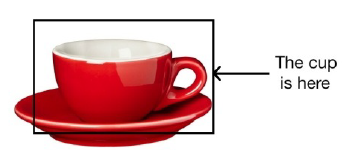
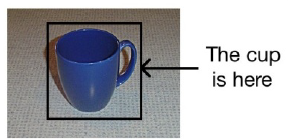


Jika kita melatih pengenalan objek, sistem akan memberikan semua informasi yang terkait dengan objek tersebut. Pengenal objek dapat berfungsi lebih akurat jika mengetahui di mana lokasi objek itu berada. Jika gambar terlalu besar dan terdapat objek cangkir berukuran kecil, maka pengenal objek mungkin tidak dapat mengenalinya. Oleh karena itu, langkah pertama dalam proses mengenali objek kita harus melakukan pendeteksian objek dan memberikan kotak pembatas objek. Setelah pendeteksian objek berhasil, kita dapat menjalankan pengenalan objek untuk mengekstrak lebih banyak informasi.

<div>
    <img src="attachment:image-3.png" width="300"/>
</div>

<div>
    <img src="attachment:image-4.png" width="300"/>
</div>

### Dense feature (fitur padat)

Untuk mengekstrak sejumlah informasi yang berarti dari gambar, kita perlu memastikan ekstraktor fitur kita mengekstrak fitur dari semua bagian dari gambar yang diberikan. Perhatikan gambar berikut:

<div>
    <img src="attachment:image.png" width="250"/>
</div>

Jika kita mengekstrak fitur menggunakan fitur SIFT, maka gambar akan terlihat seperti ini:

<div>
    <img src="attachment:image-2.png" width="250"/>
</div>

Jika kita menggunakan fitur padat (dense feature), maka gambar akan terlihat seperti ini:

<div>
    <img src="attachment:image-3.png" width="250"/>
</div>

Kita juga dapat mengontrol kepadatannya (density). Kita dapat mengaturnya lebih jarang:

<div>
    <img src="attachment:image-4.png" width="250"/>
</div>

Dengan menggunakan dense feature, kita dapat memastikan bahwa semua bagian dalam gambar akan diproses. Saat kita menggunakan fitur SIFT, beberapa bagian gambar diabaikan. Fitur SIFT bekerja dengan baik ketika kita berurusan dengan pendeteksian fitur yang menonjol (menarik) saja.  Namun, untuk membangun sebuah pengenalan objek, kita perlu mengevaluasi semua bagian dari gambar. Oleh karena itu, kita akan menggunakan dense feature untuk membangun sistem pengenalan objek.


### Visual dictionary

Kita akan menggunakan model Bag of Words untuk membangun object recognation. Setiap gambar direpresentasikan sebagai histogram kata-kata visual. Kata-kata visual ini pada dasarnya adalah N centroid yang dibangun menggunakan semua titik kunci (keypoint) yang diekstraksi dari gambar pelatihan. Alurnya seperti terlihat pada gambar berikut ini:

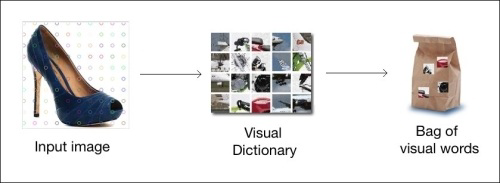

Dari setiap gambar pelatihan, kita akan mendeteksi sekumpulan titik kunci dan mengekstrak fitur untuk masing-masing titik kunci tersebut. Setiap gambar akan memunculkan jumlah titik kunci yang berbeda. Untuk melatih classifier, setiap gambar harus direpresentasikan menggunakan vektor fitur yang memiliki ukuran yang sama. Vektor fitur ini tidak lain adalah histogram, dimana setiap bin sesuai dengan kata visual.

Saat kita mengekstrak semua fitur dari semua titik kunci dalam gambar pelatihan, kita juga melakukan pengelompokan K-Means dan mengekstrak N centroid. N ini adalah panjang vektor fitur dari gambar yang diberikan. Setiap gambar sekarang akan direpresentasikan sebagai histogram, dimana setiap bin sesuai dengan salah satu centroid 'N'. Sebagai contoh, N kita setel sama dengan 4. Sekarang, pada gambar yang diberikan, kita mengekstrak K titik kunci. Dari K titik kunci ini, beberapa di antaranya akan dekat dengan centroid pertama, beberapa di antaranya akan dekat dengan centroid kedua, dan seterusnya. Jadi, kita membangun histogram berdasarkan centroid terdekat dengan setiap titik kunci. Histogram ini menjadi vektor fitur kita. Proses ini disebut kuantisasi vektor.

Untuk memahami kuantisasi vektor, mari kita perhatikan sebuah contoh. Asumsikan kita memiliki gambar dan kita telah mengekstrak sejumlah poin fitur tertentu darinya. Sekarang tujuan kita adalah untuk merepresentasikan gambar ini dalam bentuk vektor fitur. Perhatikan gambar berikut:

<div>
    <img src="attachment:image-2.png" width="200"/>
</div>

Gambar ini memiliki 4 centroid. Ingatlah bahwa titik-titik yang ditunjukkan pada gambar mewakili ruang fitur dan bukan lokasi geometris sebenarnya dari titik fitur tersebut dalam gambar. Titik-titik dari banyak lokasi geometris yang berbeda dalam sebuah gambar dapat berdekatan satu sama lain dalam ruang fitur. Tujuan kita adalah untuk merepresentasikan gambar ini dalam histogram, dimana setiap bin sesuai dengan salah satu centroid ini. Berapa banyak titik fitur yang kita ekstrak dari sebuah gambar akan selalu dikonversi ke vektor fitur dengan panjang tetap. Jadi, kita membulatkan setiap titik fitur ke centroid terdekat, seperti yang ditunjukkan pada gambar berikutnya:

<div>
    <img src="attachment:image-3.png" width="200"/>
</div>

Maka histogram gambar tersebut akan terlihat seperti berikut.


<div>
    <img src="attachment:image-5.png" width="200"/>
</div>

Ini merupakan teknik yang sangat powerful dan banyak digunakan dalam visi komputer dan pemrosesan sinyal. Ada banyak cara berbeda untuk melakukan hal ini dan akurasinya tergantung pada seberapa halus kita menginginkannya. Jika kita menambah jumlah centroid, maka akan dapat merepresentasikan gambar dengan lebih baik, sehingga meningkatkan keunikan vektor fitur. Tetapi kita juga tidak boleh terus meningkatkan jumlah centroid tanpa batas, itu akan menjadi terlalu noisy dan kehilangan kekuatannya.

### Supervised dan unsupervised learning

Supervised learning mengacu pada membangun fungsi berdasarkan sampel berlabel. Misalnya, jika kita sedang membangun sistem untuk membedakan antara gambar baju dan gambar sepatu, pertama-tama kita perlu membangun database dan memberi label. Kita perlu memberi tahu algoritma gambar yang bagaimana yang dikatakan baju dan gambar yang bagaimana yang dikatakan sepatu. Berdasarkan data ini, algoritma akan mempelajari cara mengidentifikasi baju dan cara mengindentifikasi sepatu, sehingga ketika ada gambar baru yang masuk, algoritma dapat mengenali apakah gambar tersebut baju atau sepatu.

Unsupervised learning adalah kebalikan dari apa yang baru saja kita diskusikan. Tidak ada data berlabel yang tersedia pada unsupervised learning. Katakanlah kita memiliki banyak gambar, dan kita hanya ingin memisahkannya menjadi 3 kelompok. Kita tidak tahu kriterianya seperti apa. Jadi, algoritma unsupervised learning akan mencoba memisahkan sekumpulan data yang diberikan menjadi 3 kelompok dengan cara terbaik. Alasan kita membahas ini adalah karena kita akan menggunakan kombinasi supervised dan unsupervised learning untuk membangun sistem pengenalan objek.

### Support Vector Machines

Support Vector Machines (SVM) adalah model supervised learning yang sangat populer di ranah machine learning. SVM sangat bagus dalam menganalisa data berlabel dan mendeteksi polanya. Jika diberikan sekumpulan titik data dengan label yang sudah diketahui, SVM akan membangun hyperplane pemisah dengan cara terbaik. Apa itu hyperplane? Perhatikan gambar di bawah ini.

<div>
    <img src="attachment:image.png" width="250"/>
</div>

Seperti yang terlihat pada gambar, titik-titik dipisahkan oleh batas garis yang berjarak sama dari titik-titik tersebut. Ini mudah divisualisasikan dalam 2 dimensi. Jika dalam 3 dimensi, pemisah akan menjadi sebuah bidang (planes). Saat kita membuat fitur untuk gambar, kita akan menggunakan ruang fitur berdimensi tinggi, pemisahnya menjadi sebuah hyperplanes. Setelah hyperplanes dirumuskan, kita akan menggunakan model matematika tersebut untuk mengklasifikasikan data yang belum diketahui labelnya berdasarkan lokasinya pada peta tersebut.

### Implementasi pengenalan objek

Sekarang kita telah sampai pada intinya. Sekarang, mari kita membuat sistem pengenalan objek yang dapat mengenali apakah gambar yang diberikan berisi baju kaos, sepatu kets, atau tas ransel. Kita dapat dengan mudah memperluas sistem ini untuk mendeteksi lebih banyak macam objek lainnya. Namun, untuk praktikum kali ini hanya menggunakan 3 item saja yaitu: kaos, kets, dan ransel.

Sebelum kita mulai, kita perlu memastikan bahwa kita memiliki data gambar sebagai training set. Ada banyak dataset yang tersedia secara online dimana gambar sudah diatur ke dalam folder sesuai dengan labelnya. Caltech256 merupakan salah satu dataset yang paling populer untuk pengenalan objek. Caltech256 dapat diunduh pada link berikut: https://data.caltech.edu/records/nyy15-4j048. 

Langkah selanjutnya, kita membuat folder bernama images dan tiga subfolder di dalamnya dengan nama: kaos, kets, dan ransel. Di dalam masing-masing subfolder itu, tambahkan masing-masing 20 gambar. Gambar juga boleh diunduh dari sumber lain di internet, tetapi pastikan gambar-gambar itu memiliki latar belakang yang bersih, seperti contoh berikut.

<div>
    <img src="attachment:image.png" width="200"/>
</div>

Saat ini kita telah memiliki 60 gambar training, kita siap untuk memulai. Sebenarnya sistem pengenalan objek membutuhkan puluhan ribu gambar training agar dapat bekerja dengan baik di dunia nyata. Menambahkan lebih banyak gambar untuk training dapat meningkatkan akurasi dari sistem pengenalan objek tersebut.

Langkah pertama adalah mengekstrak vektor fitur dari semua gambar training dan membangun kamus visual (codebook). Berikut coding-nya:

In [ ]:
#Di bawah ini adalah code 1, save code ini dalam file baru dengan nama file: create_features.py
#Buat sebuah folder bernama models untuk menampung keluaran code ini
#Buat sebuah folder new_images dan masukkan beberapa gambar baru untuk menguji model kita nanti
#Simpan ke-3 file code, folder models, folder images, dan folder new_images di dalam folder yang sama dengan file ipynb ini

import os 
import sys
import argparse 
import pickle
import json 
 
import cv2 
import numpy as np 
from sklearn.cluster import KMeans 
 
class DenseDetector(): 
    def __init__(self, step_size=20, feature_scale=20, img_bound=20): 
        # Create a dense feature detector 
        self.initXyStep = step_size
        self.initFeatureScale = feature_scale
        self.initImgBound = img_bound
 
    def detect(self, img):
        keypoints = []
        rows, cols = img.shape[:2]
        for x in range(self.initImgBound, rows, self.initFeatureScale):
            for y in range(self.initImgBound, cols, self.initFeatureScale):
                keypoints.append(cv2.KeyPoint(float(x), float(y), self.initXyStep))
        return keypoints 

class SIFTExtractor():
    def __init__(self):
        self.extractor = cv2.xfeatures2d.SIFT_create()

    def compute(self, image, kps): 
        if image is None: 
            print("Not a valid image")
            raise TypeError 
 
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
        kps, des = self.extractor.detectAndCompute(gray_image, None) 
        return kps, des 

# Vector quantization 
class Quantizer(object): 
    def __init__(self, num_clusters=32): 
        self.num_dims = 128 
        self.extractor = SIFTExtractor() 
        self.num_clusters = num_clusters 
        self.num_retries = 10 
 
    def quantize(self, datapoints): 
        # Create KMeans object 
        kmeans = KMeans(self.num_clusters, 
                        n_init=max(self.num_retries, 1), 
                        max_iter=10, tol=1.0) 
 
        # Run KMeans on the datapoints 
        res = kmeans.fit(datapoints) 
 
        # Extract the centroids of those clusters 
        centroids = res.cluster_centers_
 
        return kmeans, centroids 
 
    def normalize(self, input_data): 
        sum_input = np.sum(input_data) 
        if sum_input > 0: 
            return input_data / sum_input 
        else: 
            return input_data 
 
    # Extract feature vector from the image 
    def get_feature_vector(self, img, kmeans, centroids): 
        kps = DenseDetector().detect(img) 
        kps, fvs = self.extractor.compute(img, kps) 
        labels = kmeans.predict(fvs.astype(float)) 
        fv = np.zeros(self.num_clusters) 
 
        for i, item in enumerate(fvs): 
            fv[labels[i]] += 1 
 
        fv_image = np.reshape(fv, ((1, fv.shape[0]))) 
        return self.normalize(fv_image)


class FeatureExtractor(object): 
    def extract_image_features(self, img): 
        # Dense feature detector 
        kps = DenseDetector().detect(img) 
 
        # SIFT feature extractor 
        kps, fvs = SIFTExtractor().compute(img, kps) 
 
        return fvs 
 
    # Extract the centroids from the feature points 
    def get_centroids(self, input_map, num_samples_to_fit=10): 
        kps_all = [] 
 
        count = 0 
        cur_label = '' 
        for item in input_map: 
            if count >= num_samples_to_fit: 
                if cur_label != item['label']: 
                    count = 0 
                else: 
                    continue 
 
            count += 1 
 
            if count == num_samples_to_fit: 
                print("Built centroids for", item['label'])
 
            cur_label = item['label'] 
            img = cv2.imread(item['image']) 
            img = resize_to_size(img, 150) 
 
            num_dims = 128 
            fvs = self.extract_image_features(img) 
            kps_all.extend(fvs) 
 
        kmeans, centroids = Quantizer().quantize(kps_all) 
        return kmeans, centroids 
 
    def get_feature_vector(self, img, kmeans, centroids): 
        return Quantizer().get_feature_vector(img, kmeans, centroids) 
 
 
def build_arg_parser(): 
    parser = argparse.ArgumentParser(description='Creates features for given images')
    parser.add_argument("--samples", dest="cls", nargs="+", action="append", required=True,\
        help="Folders containing the training images.\nThe first element needs to be the class label.") 
    parser.add_argument("--codebook-file", dest='codebook_file', required=True, 
        help="Base file name to store the codebook") 
    parser.add_argument("--feature-map-file", dest='feature_map_file', required=True,\
        help="Base file name to store the feature map") 
 
    return parser 
 
# Loading the images from the input folder 
def load_input_map(label, input_folder): 
    combined_data = [] 
 
    if not os.path.isdir(input_folder): 
        raise IOError("The folder " + input_folder + " doesn't exist") 
 
    # Parse the input folder and assign the  labels 
    for root, dirs, files in os.walk(input_folder): 
        for filename in (x for x in files if x.endswith('.jpg')): 
            combined_data.append({'label': label, 'image': 
             os.path.join(root, filename)}) 
 
    return combined_data 
 
def extract_feature_map(input_map, kmeans, centroids): 
    feature_map = [] 
 
    for item in input_map: 
        temp_dict = {} 
        temp_dict['label'] = item['label'] 
 
        print("Extracting features for", item['image'])
        img = cv2.imread(item['image']) 
        img = resize_to_size(img, 150) 
 
        temp_dict['feature_vector'] = FeatureExtractor().get_feature_vector(img, kmeans, centroids) 
 
        if temp_dict['feature_vector'] is not None: 
            feature_map.append(temp_dict) 
 
    return feature_map 
 
# Resize the shorter dimension to 'new_size' 
# while maintaining the aspect ratio 
def resize_to_size(input_image, new_size=150): 
    h, w = input_image.shape[0], input_image.shape[1] 
    ds_factor = new_size / float(h) 
 
    if w < h: 
        ds_factor = new_size / float(w) 
 
    new_size = (int(w * ds_factor), int(h * ds_factor)) 
    return cv2.resize(input_image, new_size) 
 
if __name__=='__main__': 
    args = build_arg_parser().parse_args() 
 
    input_map = [] 
    for cls in args.cls:
        assert len(cls) >= 2, "Format for classes is `<label> file`" 
        label = cls[0] 
        input_map += load_input_map(label, cls[1]) 
 
    # Building the codebook 
    print("===== Building codebook =====")
    kmeans, centroids = FeatureExtractor().get_centroids(input_map) 
    if args.codebook_file: 
        with open(args.codebook_file, 'wb') as f: 
            print('kmeans', kmeans)
            print('centroids', centroids)
            pickle.dump((kmeans, centroids), f) 
 
    # Input data and labels 
    print("===== Building feature map =====")
    feature_map = extract_feature_map(input_map, kmeans, 
     centroids) 
    if args.feature_map_file: 
        with open(args.feature_map_file, 'wb') as f: 
            pickle.dump(feature_map, f)



In [6]:
!python create_features.py --samples backpack images/backpack --samples calculator images/calculator --samples laptop images/laptop --codebook-file models/codebook.pkl --feature-map-file models/feature_map.pkl

===== Building codebook =====
Built centroids for backpack
Built centroids for calculator
Built centroids for laptop
kmeans KMeans(max_iter=10, n_clusters=32, n_init=10, tol=1.0)
centroids [[14.05755396 33.00719424 53.45323741 ... 19.28776978 26.44604317
  13.30215827]
 [14.85234899  8.10738255 14.62416107 ... 17.18120805  3.38255034
   3.40268456]
 [12.98958333 15.29166667 23.8125     ...  7.40625     7.28125
  11.76041667]
 ...
 [50.75       13.921875    8.07291667 ...  6.30729167  5.51041667
  11.21354167]
 [14.85802469 11.25308642 17.83333333 ...  1.25925926  4.08641975
  29.27777778]
 [26.57668712 11.41104294 11.46625767 ...  7.23312883  6.02453988
  28.74233129]]
===== Building feature map =====
Extracting features for images/backpack\003_0001.jpg
Extracting features for images/backpack\003_0002.jpg
Extracting features for images/backpack\003_0003.jpg
Extracting features for images/backpack\003_0004.jpg
Extracting features for images/backpack\003_0005.jpg
Extracting features for 

[ WARN:0@2.306] global shadow_sift.hpp:15 cv::xfeatures2d::SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


#### Yang dilakukan oleh kode di atas:

Hal pertama yang perlu kita lakukan adalah mengekstrak centroid. Ini adalah bagaimana kita akan membangun kamus visual kita. Metode get_centroids di kelas FeatureExtractor dirancang untuk melakukan ini. Kita terus mengumpulkan fitur gambar yang diekstraksi dari titik kunci sampai kita memiliki jumlah yang cukup. Menggunakan 10 gambar sudah cukup karena kita menggunakan detektor padat. Alasan kita hanya mengambil 10 gambar adalah karena hal itu akan memunculkan banyak fitur. Centroid tidak akan banyak berubah jika kita menambahkan lebih banyak poin fitur.

Setelah mengekstrak centroid, kita siap untuk melanjutkan ke langkah ekstraksi fitur berikutnya. Himpunan centroid adalah kamus visual kita. Fungsinya extract_feature_map akan mengekstrak vektor fitur dari setiap gambar dan mengaitkannya dengan label yang sesuai. Alasan kita melakukan ini adalah karena kita membutuhkan pemetaan tersebut untuk melatih classifier. Kita membutuhkan satu set titik data, dan setiap titik data harus dikaitkan dengan label. Jadi, kita mulai dari sebuah gambar, mengekstrak vektor fitur, dan kemudian mengaitkannya dengan label yang sesuai, seperti kaos, kets, dan ransel.

Kelas Quantizer dirancang untuk mencapai kuantisasi vektor dan membangun vektor fitur. Untuk setiap titik kunci yang diekstraksi dari gambar, metode get_feature_vector menemukan kata visual terdekat dalam kamus. Dengan melakukan ini, kita akhirnya membangun histogram berdasarkan kamus visual. Setiap gambar sekarang direpresentasikan sebagai kombinasi dari sekumpulan kata visual. Oleh karena itu namanya, Bag of Words. 

Langkah selanjutnya adalah melatih classifier menggunakan fitur-fitur tersebut. Berikut coding-nya:

In [ ]:
#Di bawah ini adalah code 2, save code ini dalam file baru dengan nama file: training.py

import os 
import sys 
import argparse 
 
import pickle
import numpy as np 
from sklearn.multiclass import OneVsOneClassifier 
from sklearn.svm import LinearSVC 
from sklearn import preprocessing 
 
# To train the classifier 
class ClassifierTrainer(object): 
    def __init__(self, X, label_words): 
        # Encoding the labels (words to numbers) 
        self.le = preprocessing.LabelEncoder() 
 
        # Initialize One vs One Classifier using a linear kernel 
        self.clf = OneVsOneClassifier(LinearSVC(random_state=0)) 
 
        y = self._encodeLabels(label_words) 
        X = np.asarray(X) 
        self.clf.fit(X, y) 
 
    # Predict the output class for the input datapoint 
    def _fit(self, X): 
        X = np.asarray(X) 
        return self.clf.predict(X) 
 
    # Encode the labels (convert words to numbers) 
    def _encodeLabels(self, labels_words): 
        self.le.fit(labels_words) 
        return np.array(self.le.transform(labels_words), 
         dtype=np.float32) 
 
    # Classify the input datapoint 
    def classify(self, X): 
        labels_nums = self._fit(X) 
        labels_words = self.le.inverse_transform([int(x) for x in 
         labels_nums]) 
        return labels_words 
 
def build_arg_parser(): 
    parser = argparse.ArgumentParser(description='Trains the classifier models')
    parser.add_argument("--feature-map-file", dest="feature_map_file", required=True,\
        help="Input pickle file containing the feature map") 
    parser.add_argument("--svm-file", dest="svm_file", required=False,\
        help="Output file where the pickled SVM model will be stored") 
    return parser 
    
if __name__=='__main__': 
    args = build_arg_parser().parse_args() 
    feature_map_file = args.feature_map_file 
    svm_file = args.svm_file 
 
    # Load the feature map 
    with open(feature_map_file, 'rb') as f: 
        feature_map = pickle.load(f) 
 
    # Extract feature vectors and the labels 
    labels_words = [x['label'] for x in feature_map] 
 
    # Here, 0 refers to the first element in the 
    # feature_map, and 1 refers to the second 
    # element in the shape vector of that element 
    # (which gives us the size) 
    dim_size = feature_map[0]['feature_vector'].shape[1] 
 
    X = [np.reshape(x['feature_vector'], (dim_size,)) for x in feature_map] 
 
    # Train the SVM 
    svm = ClassifierTrainer(X, labels_words) 
    if args.svm_file: 
        with open(args.svm_file, 'wb') as f: 
            pickle.dump(svm, f) 


In [7]:
!python training.py --feature-map-file models/feature_map.pkl --svm-file models/svm.pkl

c:\Users\ahini\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\ahini\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\ahini\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Sekarang classifier telah dilatih, kita hanya perlu modul untuk mengklasifikasikan gambar input dan mendeteksi objek di dalamnya. Kita berikan gambar baru untuk menguji kinerja pengenal objek tersebut. Gambar baru yang ingin diuji diletakkan dalam folder new_images. Berikut adalah coding-nya:

In [ ]:
import os 
import sys 
import argparse 
import pickle 
import cv2 
import numpy as np 
import create_features as cf 
from training import ClassifierTrainer 
 
# Classifying an image 
class ImageClassifier(object): 
    def __init__(self, svm_file, codebook_file): 
        # Load the SVM classifier 
        with open(svm_file, 'rb') as f: 
            self.svm = pickle.load(f) 
 
        # Load the codebook 
        with open(codebook_file, 'rb') as f: 
            self.kmeans, self.centroids = pickle.load(f) 
 
    # Method to get the output image tag 
    def getImageTag(self, img): 
        # Resize the input image 
        img = cf.resize_to_size(img) 
 
        # Extract the feature vector 
        feature_vector = cf.FeatureExtractor().get_feature_vector(img, self.kmeans, self.centroids) 
 
        # Classify the feature vector and get the output tag 
        image_tag = self.svm.classify(feature_vector) 
 
        return image_tag 


def classify_images_in_folder(svm_file, codebook_file, folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            input_image = cv2.imread(os.path.join(folder_path, filename))
            tag = ImageClassifier(svm_file, codebook_file).getImageTag(input_image)
            print(f"{filename} [{tag}]")

def build_arg_parser(): 
    parser = argparse.ArgumentParser(description='Extracts features from each line and classifies the data') 
    parser.add_argument("--svm-file", dest="svm_file", required=True,\
        help="File containing the trained SVM model") 
    parser.add_argument("--codebook-file", dest="codebook_file", required=True,\
        help="File containing the codebook") 
    parser.add_argument("--folder", dest="folder", required=True,\
        help="Folder containing the images to be classified")
    return parser 
 
if __name__=='__main__': 
    args = build_arg_parser().parse_args() 
    svm_file = args.svm_file 
    codebook_file = args.codebook_file 
    folder_path = args.folder

    classify_images_in_folder(svm_file, codebook_file, folder_path)


In [13]:
!python classify_data.py --svm-file models/svm.pkl --codebook-file models/codebook.pkl --folder img_tes

calculator1.jpg [['calculator']]
calculator2.jpg [['backpack']]
calculator3.jpg [['calculator']]
calculator4.jpg [['calculator']]
calculator5.jpg [['calculator']]
laptop1.jpg [['backpack']]
laptop2.jpg [['backpack']]
laptop3.jpg [['backpack']]
laptop4.jpg [['backpack']]
laptop5.jpg [['laptop']]
tas1.jpg [['backpack']]
tas2.jpg [['backpack']]
tas3.jpg [['backpack']]
tas4.jpg [['backpack']]


[ WARN:0@2.292] global shadow_sift.hpp:15 cv::xfeatures2d::SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


Kita dapat menggunakan teknik yang sama untuk membangun mesin pencari visual (visual search engine). Mesin pencari visual melihat gambar input dan menghasilkan output berupa gambar-gambar yang mirip dengan input. Kita dapat menggunakan framework pengenalan objek ini untuk membangun mesin pencari visual tersebut. Ekstrak vektor fitur dari gambar input dan bandingkan dengan semua vektor fitur dalam kumpulan training data. Pilih kecocokan teratas dan tampilkan hasilnya. Ini adalah cara sederhana untuk melakukan pencarian gambar.

Di dunia nyata, kita harus berurusan dengan miliaran gambar. Jadi, kita tidak dapat menelusuri setiap gambar sebelum menampilkan hasilnya. Ada banyak algoritma yang digunakan untuk memastikan bahwa hal ini akan efisien dan cepat di dunia nyata. Deep learning banyak digunakan dalam bidang ini dan telah menunjukkan hasil yang cukup baik dalam beberapa tahun terakhir. Deep learning merupakan cabang machine learning yang berfokus pada pembelajaran representasi data yang optimal, sehingga menjadi lebih mudah bagi mesin untuk mempelajari tugas-tugas baru.

In [ ]:
#Latihan
#Modifikasilah file classify_data.py agar semua gambar yang ada dalam folder new_image
#dapat dibaca dengan proses perulangan (looping).
#Keluarannya: "nama_image.jpg [tag]" perulangan untuk semua gambar dalam folder new_images.
#Setelah berhasil, replace code yang baru ke file ipynb ini di tempat yang sama
#Jalankan juga command line di bawahnya agar terlihat keluarannya.
#Kumpulkan file html-nya saja melalui e-learning!